# Importar


In [1]:
!pip install sklearn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Ler 

In [2]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/Colab Notebooks/UME_ANALISE/sample15k_synth.csv"

Mounted at /content/drive


In [3]:
data = pd.read_csv(path)
data.head()

,date,demo1,demo2,demo3,demo4,demo5,demo6,job1,job2,job3,job4,income1,income2,debt1,debt2,debt3,target
0,2015-08-25,18,-1,1,4,12,1,0,0,19,2,0,1034.5000,-1,0,NaN,0
1,2015-08-12,24,1,1,4,60,1,1,0,0,2,0,1344.8500,0,0,0.8218,0
2,2015-08-08,41,1,1,3,98,1,1,0,0,4,0,2275.9000,2,0,0.9558,1
3,2015-08-14,30,0,1,5,108,1,0,0,30,2,0,1344.8500,5,0,0.9304,0
4,2015-08-28,18,-1,1,4,120,1,0,0,0,4,0,1008.6375,-1,0,NaN,0


# Explorar Dados

##Verificar Valores Nulos e preencher


 Numero de Dados Faltantes >>> 454


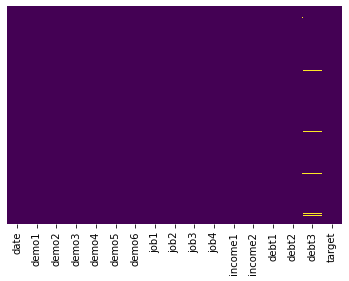

In [4]:
#data['debt3'].isnull().sum().sum()
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
print("\n Numero de Dados Faltantes >>>",data['debt3'].isnull().sum().sum())

* Valores Nulos preenchidos com a Mediana do respectivo atributo

In [5]:
mediana = data['debt3'].median()
data['debt3'] = data['debt3'].replace(np.nan, mediana) 
data.head()

,date,demo1,demo2,demo3,demo4,demo5,demo6,job1,job2,job3,job4,income1,income2,debt1,debt2,debt3,target
0,2015-08-25,18,-1,1,4,12,1,0,0,19,2,0,1034.5000,-1,0,0.8506,0
1,2015-08-12,24,1,1,4,60,1,1,0,0,2,0,1344.8500,0,0,0.8218,0
2,2015-08-08,41,1,1,3,98,1,1,0,0,4,0,2275.9000,2,0,0.9558,1
3,2015-08-14,30,0,1,5,108,1,0,0,30,2,0,1344.8500,5,0,0.9304,0
4,2015-08-28,18,-1,1,4,120,1,0,0,0,4,0,1008.6375,-1,0,0.8506,0


In [6]:
#data=  data[['demo1','demo2','demo3','demo4','demo5','demo6','job1','job2','job3','target']]

* Discretização dos Atributos

In [7]:
data.describe()

,demo1,demo2,demo3,demo4,demo5,demo6,job1,job2,job3,job4,income1,income2,debt1,debt2,debt3,target
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.00000,15000.000000,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000
mean,35.612000,0.329000,1.789600,3.169533,134.528600,1.313067,0.415000,0.043800,45.89740,3.267400,0.084600,2.087556e+03,2.814733,0.105133,0.845104,0.182067
std,13.452303,0.571297,1.270737,1.353260,130.450049,0.760194,0.492738,0.204657,69.09502,1.771244,0.278295,8.674153e+03,1.888098,0.306735,0.077024,0.385912
min,18.000000,-1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000,7.034600e+02,-1.000000,0.000000,0.142300,0.000000
25%,24.000000,0.000000,1.000000,2.000000,36.000000,1.000000,0.000000,0.000000,0.00000,2.000000,0.000000,1.241400e+03,2.000000,0.000000,0.803600,0.000000
50%,33.000000,0.000000,1.000000,4.000000,102.000000,1.000000,0.000000,0.000000,19.00000,2.000000,0.000000,1.551750e+03,3.000000,0.000000,0.850600,0.000000
75%,44.000000,1.000000,2.000000,4.000000,216.000000,1.000000,1.000000,0.000000,55.00000,4.000000,0.000000,2.172450e+03,4.000000,0.000000,0.899800,0.000000
max,80.000000,1.000000,7.000000,5.000000,2520.000000,5.000000,1.000000,1.000000,722.00000,9.000000,1.000000,1.018982e+06,5.000000,1.000000,0.999000,1.000000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


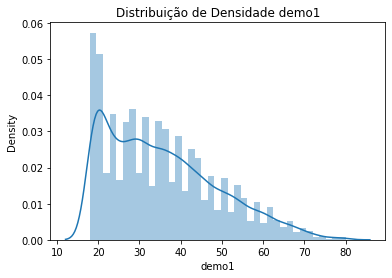

In [8]:
sns.distplot(data['demo1'], kde=True)
plt.title('Distribuição de Densidade demo1')
plt.show()

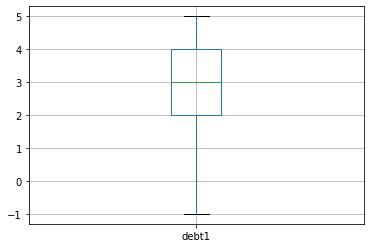

In [9]:
data.boxplot(column=['debt1'])

In [10]:
import plotly.express as px
dados = data.copy()
fig = px.scatter(dados, x="demo1", y="job3", color="target",
                 size='debt3')#, hover_data=['current_votes'])
fig.show()

## Analisar Correlação de Atributos

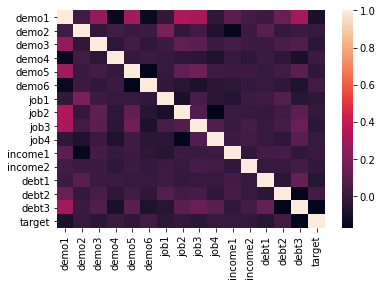

In [11]:
sns.heatmap(data.corr(),robust=True)

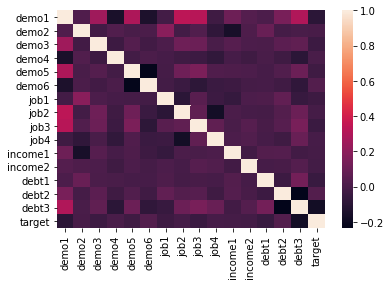

In [12]:
sns.heatmap(data.corr(),robust=False)

* Correlação entre todas os atributos entre si

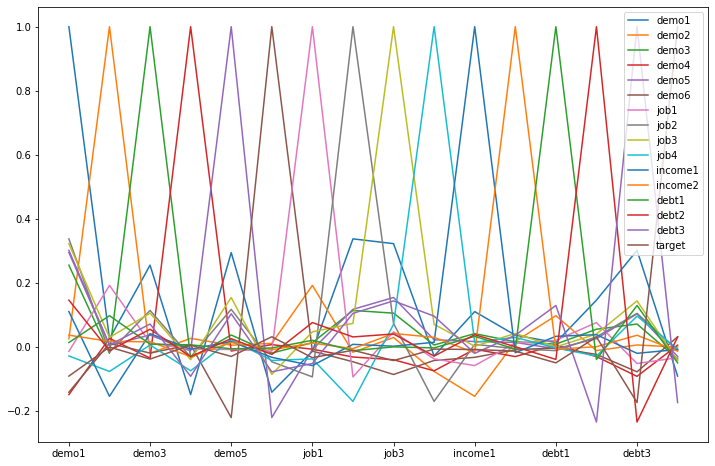

In [13]:
data.corr().plot(figsize=(12,8))

In [14]:
#sns.pairplot(data)

## Filtragem de Datasets

In [15]:
# X_data = data[['date', 'demo1', 'demo2', 'demo3', 'demo4', 'demo5', 'demo6', 'job1',
#        'job2', 'job3', 'job4', 'income1', 'income2', 'debt1', 'debt2', 'debt3']]
# X_data.head()

* Ler os dados e aplicar um filtro através das mascaras:
  * Dados de Agosto e Setembro

> Observação e autoanálise : 
*      Erro Interpretativo Pessoal : o nome das variáveis estão fazendo referência ao mês de Agosto como *X_train* com o 'target' do mês em *y_train*, assim também como o mês de setembro em X_test com seu respectivo Y_test.    Percebi que o conjunto de setembro deve ser utilizada somente quando os modelos já estiverem prontos , para então aferir o desempenho dos mesmos. Logo o test de setembro não é para o treinamento do modelo em agosto e sim após o treinamento.
* Solução: Efetuar a separação e salvar em datasets com a extenção ' .pkl ' para fácil manuseio e reuso. Além disso, utilizar os datasets com seus respectivos nomes referentes ao mês em questão  a saber : *dt_agosto* , *dt_setembro*



In [16]:
# # Definindo máscara para aplicação da filtragem de datas
# mask_Agosto = (X_data['date'] > '2015-08-1') & (X_data['date'] <= '2015-08-31') 
# mask_Setembro =  (X_data['date'] > '2015-09-1') & (X_data['date'] <= '2015-09-30') 
# # Train 
# X_train = X_data.loc[mask_Agosto]
# y_train = data['target'].loc[mask_Agosto]
# #Test
# X_test = X_data.loc[mask_Setembro]
# y_test = data['target'].loc[mask_Setembro]
# #
# print('X')
# print("Minima              Máxima              Tamanho")
# print(X_train['date'].min(),X_train['date'].max(),X_train.shape)
# print(X_test['date'].min(),X_test['date'].max(),X_test.shape)
# #
# X_train = X_train[['demo1', 'demo2', 'demo3', 'demo4', 'demo5', 'demo6', 'job1',
#        'job2', 'job3', 'job4', 'income1', 'income2', 'debt1', 'debt2', 'debt3']]
# X_test = X_test[['demo1', 'demo2', 'demo3', 'demo4', 'demo5', 'demo6', 'job1',
#        'job2', 'job3', 'job4', 'income1', 'income2', 'debt1', 'debt2', 'debt3']]

# X_train.head()
# #


In [17]:
# print(y_train.shape,y_test.shape)

* exportando dados para reuso

In [18]:
# dt_export1 = pd.concat([X_train,y_train],axis=1)
# dt_export1.to_pickle("/content/drive/MyDrive/Colab Notebooks/UME_ANALISE/dt_agosto.pkl")
# dt_export2 = pd.concat([X_test,y_test],axis=1)
# dt_export2.to_pickle("/content/drive/MyDrive/Colab Notebooks/UME_ANALISE/dt_setembro.pkl")

#Ler dados filtrados

In [19]:
dt_agosto = pd.read_pickle("/content/drive/MyDrive/Colab Notebooks/UME_ANALISE/dt_agosto.pkl")

dt_setembro =  pd.read_pickle("/content/drive/MyDrive/Colab Notebooks/UME_ANALISE/dt_setembro.pkl")
#
print("\ndt_agosto => {}".format(dt_agosto.shape))
print("\ndt_setembro => {}".format(dt_setembro.shape))


dt_agosto => (7879, 16)

dt_setembro => (3506, 16)


# Testando Funções de Machine Learning sem Ensembles
* DecisionTree
* Random florest
* KNN
* Gaussian Naive Bayes

## Random Florest

In [20]:
from sklearn.model_selection import train_test_split
#
x_train, x_test, y_train, y_test = train_test_split(
    dt_agosto[['demo1', 'demo2', 'demo3', 'demo4', 'demo5', 'demo6', 'job1', 'job2','job3', 'job4', 'income1', 'income2', 'debt1', 'debt2', 'debt3']],
    dt_agosto['target'],
    test_size=0.3,random_state=4)

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

precision_rfc =[]

for n in range(1,30):
  rfc = RandomForestClassifier(n_estimators=n)
  rfc.fit(x_train, y_train)
  y_pred = rfc.predict(x_test)
  precision_rfc.append(rfc.score(x_test,y_test))

##K-NN

In [22]:
from sklearn.model_selection import train_test_split
#
x_train, x_test, y_train, y_test = train_test_split(
    dt_agosto[['demo1', 'demo2', 'demo3', 'demo4', 'demo5', 'demo6', 'job1', 'job2','job3', 'job4', 'income1', 'income2', 'debt1', 'debt2', 'debt3']],
    dt_agosto['target'],
    test_size=0.3,random_state=4)

In [23]:
from sklearn.neighbors import KNeighborsClassifier

precision_knn =[]

for n in range(1,30):
  knn = KNeighborsClassifier(n_neighbors = n)
  knn.fit(x_train, y_train)
  y_pred = knn.predict(x_test)
  precision_knn.append(knn.score(x_test,y_test))


## Decision Tree

In [24]:
from sklearn.model_selection import train_test_split
#
x_train, x_test, y_train, y_test = train_test_split(
    dt_agosto[['demo1', 'demo2', 'demo3', 'demo4', 'demo5', 'demo6', 'job1', 'job2','job3', 'job4', 'income1', 'income2', 'debt1', 'debt2', 'debt3']],
    dt_agosto['target'],
    test_size=0.3,random_state=4)

In [25]:
from sklearn.tree import DecisionTreeClassifier

precision_clf =[]

for n in range(1,30):
  clf = DecisionTreeClassifier()
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  precision_clf.append(clf.score(x_test,y_test))

## Resultado de testes preliminares

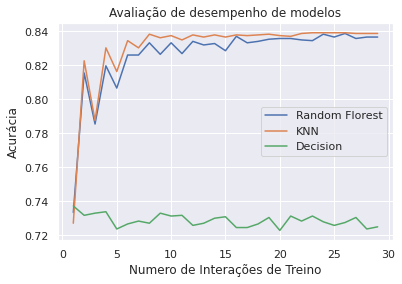

In [26]:
sns.set_theme()

plt.plot(range(1,30), precision_rfc,  label='Random Florest')
plt.plot(range(1,30), precision_knn, label='KNN')
plt.plot(range(1,30), precision_clf, label='Decision')
plt.legend()
plt.title('Avaliação de desempenho de modelos')
plt.ylabel('Acurácia')
plt.xlabel('Numero de Interações de Treino')
plt.show()

# Ensembles

##Bagging


In [27]:
from sklearn.model_selection import train_test_split
#
x_train, x_test, y_train, y_test = train_test_split(
    dt_agosto[['demo1', 'demo2', 'demo3', 'demo4', 'demo5', 'demo6', 'job1', 'job2','job3', 'job4', 'income1', 'income2', 'debt1', 'debt2', 'debt3']],
    dt_agosto['target'],
    test_size=0.3,random_state=4)

In [28]:
from sklearn.ensemble import BaggingClassifier
bg = BaggingClassifier(RandomForestClassifier(), max_samples=1,max_features = 1.0, n_estimators = 20)
bg.fit(x_train,y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                        ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features='auto',
                                                        max_leaf_nodes=None,
                                                        max_samples=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
     

In [29]:
bg.score(x_test,y_test)

0.8392554991539763

	Classification
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1984
           1       0.21      0.25      0.23       380

    accuracy                           0.73      2364
   macro avg       0.53      0.53      0.53      2364
weighted avg       0.75      0.73      0.74      2364


	Confusion Matrix


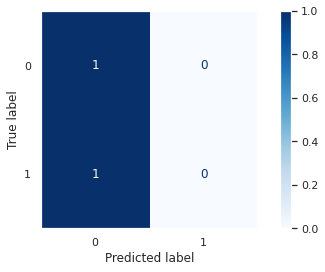

In [30]:
from sklearn.metrics import plot_confusion_matrix

sns.set_theme(style='dark')
print("\tClassification")
print(classification_report(y_test, y_pred))
print("\n\tConfusion Matrix")
fig, ax = plt.subplots(figsize=(8, 4))
plot_confusion_matrix(bg, x_test, y_test, normalize='true', cmap=plt.cm.Blues, ax=ax)
plt.show()


###Out-of-bag

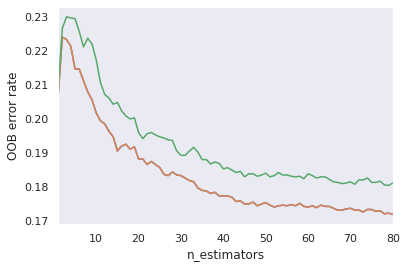

In [31]:
import warnings;
warnings.simplefilter('ignore')
from collections import OrderedDict

from sklearn.ensemble import RandomForestClassifier

RANDOM_STATE = 123

ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt",
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 1
max_estimators = 80

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(x_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.show()

	Classification
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1984
           1       0.21      0.25      0.23       380

    accuracy                           0.73      2364
   macro avg       0.53      0.53      0.53      2364
weighted avg       0.75      0.73      0.74      2364


	Confusion Matrix


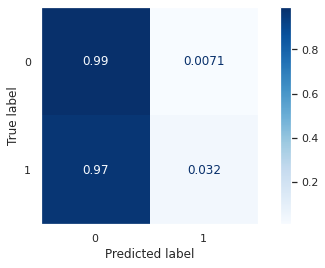

In [32]:
print("\tClassification")
print(classification_report(y_test, y_pred))
print("\n\tConfusion Matrix")
fig, ax = plt.subplots(figsize=(8, 4))
plot_confusion_matrix(clf, x_test, y_test, normalize='true', cmap=plt.cm.Blues, ax=ax)
plt.show()

##Boosting -Ada Boost

In [33]:
from sklearn.model_selection import train_test_split
#
x_train, x_test, y_train, y_test = train_test_split(
    dt_agosto[['demo1', 'demo2', 'demo3', 'demo4', 'demo5', 'demo6', 'job1', 'job2','job3', 'job4', 'income1', 'income2', 'debt1', 'debt2', 'debt3']],
    dt_agosto['target'],
    test_size=0.3,random_state=4)

In [34]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(RandomForestClassifier(),n_estimators =100, learning_rate = 2,random_state=0)
adb.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                       

In [35]:
round(adb.score(x_test,y_test),2)

0.84

	Classification
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1984
           1       0.21      0.25      0.23       380

    accuracy                           0.73      2364
   macro avg       0.53      0.53      0.53      2364
weighted avg       0.75      0.73      0.74      2364


	Confusion Matrix


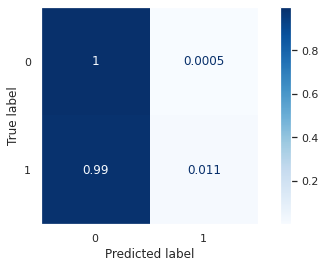

In [36]:
print("\tClassification")
print(classification_report(y_test, y_pred))
print("\n\tConfusion Matrix")
fig, ax = plt.subplots(figsize=(8, 4))
plot_confusion_matrix(adb, x_test, y_test, normalize='true', cmap=plt.cm.Blues, ax=ax)
plt.show()


##Voting Classifier - Multiple Model Ensemble

In [37]:
from sklearn.model_selection import train_test_split
#
x_train, x_test, y_train, y_test = train_test_split(
    dt_agosto[['demo1', 'demo2', 'demo3', 'demo4', 'demo5', 'demo6', 'job1', 'job2','job3', 'job4', 'income1', 'income2', 'debt1', 'debt2', 'debt3']],
    dt_agosto['target'],
    test_size=0.3,random_state=4)

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.ensemble import VotingClassifier

lr = LogisticRegression()
dt = DecisionTreeClassifier()
svm = SVC(kernel = 'poly', degree = 2 )

In [39]:
evc = VotingClassifier( estimators=[('lr',lr),('dt',dt),('svm',svm)], voting = 'hard')

In [40]:
evc.fit(x_train,y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('dt',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',...
                                        

In [41]:
evc.score(x_test, y_test)

0.8392554991539763

	Classification
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1984
           1       0.21      0.25      0.23       380

    accuracy                           0.73      2364
   macro avg       0.53      0.53      0.53      2364
weighted avg       0.75      0.73      0.74      2364


	Confusion Matrix


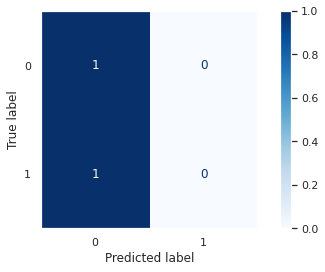

In [42]:

print("\tClassification")
print(classification_report(y_test, y_pred))
print("\n\tConfusion Matrix")
fig, ax = plt.subplots(figsize=(8, 4))
plot_confusion_matrix(evc, x_test, y_test, normalize='true', cmap=plt.cm.Blues, ax=ax)
plt.show()

##Voting Classifier 2

In [43]:
from sklearn.model_selection import train_test_split
#
x_train, x_test, y_train, y_test = train_test_split(
    dt_agosto[['demo1', 'demo2', 'demo3', 'demo4', 'demo5', 'demo6', 'job1', 'job2','job3', 'job4', 'income1', 'income2', 'debt1', 'debt2', 'debt3']],
    dt_agosto['target'],
    test_size=0.3,random_state=4)

In [44]:
from sklearn.ensemble import VotingClassifier

evc2 = VotingClassifier( estimators=[('rfc',rfc),('knn',knn),('clf',clf)], voting = 'soft')
evc2.fit(x_train,y_train)

VotingClassifier(estimators=[('rfc',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
       

In [45]:
evc2.score(x_test, y_test)

0.8392554991539763

	Classification
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1984
           1       0.21      0.25      0.23       380

    accuracy                           0.73      2364
   macro avg       0.53      0.53      0.53      2364
weighted avg       0.75      0.73      0.74      2364


	Confusion Matrix


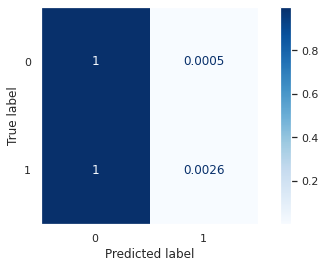

In [46]:
print("\tClassification")
print(classification_report(y_test, y_pred))
print("\n\tConfusion Matrix")
fig, ax = plt.subplots(figsize=(8, 4))
plot_confusion_matrix(evc2, x_test, y_test, normalize='true', cmap=plt.cm.Blues, ax=ax)
plt.show()

#Desempenho de Ensembles

In [47]:
dt_setembro.head()

,demo1,demo2,demo3,demo4,demo5,demo6,job1,job2,job3,job4,income1,income2,debt1,debt2,debt3,target
10002,26,0,1,4,120,1,0,0,15,2,0,1551.75,-1,0,0.8397,0
10004,21,-1,1,4,150,1,0,1,0,4,0,1551.75,5,0,0.8464,1
10005,19,-1,1,3,74,1,0,0,6,2,0,1137.95,-1,0,0.8212,1
10007,49,0,1,0,72,1,0,0,330,4,0,3103.50,0,1,0.7317,0
10008,32,0,2,3,48,1,1,0,8,2,0,1551.75,4,0,0.5036,1


In [48]:
dt_setembro.iloc[1:2,:-1]

,demo1,demo2,demo3,demo4,demo5,demo6,job1,job2,job3,job4,income1,income2,debt1,debt2,debt3
10004,21,-1,1,4,150,1,0,1,0,4,0,1551.75,5,0,0.8464


In [49]:
bg.predict(dt_setembro.iloc[1:2,:-1])

array([0])

In [50]:
bg.score(dt_setembro.iloc[:,:-1],dt_setembro['target'])

0.7977752424415288

In [51]:
adb.predict(dt_setembro.iloc[1:2,:-1])

array([0])

In [52]:
adb.score(dt_setembro.iloc[:,:-1],dt_setembro['target'])

0.7969195664575014

# Testando Normalização de Dados

In [53]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

values = dt_agosto.values
imputer = SimpleImputer()
imputedData = imputer.fit_transform(values)

In [54]:
scaler = MinMaxScaler(feature_range=(0, 1))
normalizedData = scaler.fit_transform(imputedData)

In [55]:
normalizedData.shape

(7879, 16)

In [56]:
X = normalizedData[:,0:15]
Y = normalizedData[:,15]

In [67]:
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=n, random_state=7)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=7)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
precisao.append(results.mean(()))
print(results.mean())

0.8300601126400889


In [74]:
model.fit(X,Y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,



	Confusion Matrix


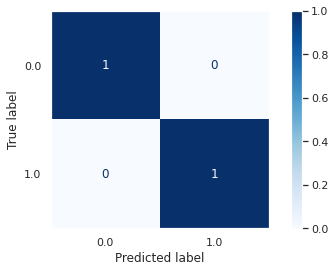

In [75]:
print("\n\tConfusion Matrix")
fig, ax = plt.subplots(figsize=(8, 4))
plot_confusion_matrix(model, X, Y, normalize='true', cmap=plt.cm.Blues, ax=ax)
plt.show()